### Initializations

In [48]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import os
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from PIL import Image, ImageEnhance
import cv2
from tensorflow.keras.utils import plot_model
import random

### Data loading and pre-processing

In [2]:
#data: shuffled and split between train and test sets, loading and using the MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

In [3]:
# Print the shapes of the input and output data
print("Training data input shape: " , x_train_mnist.shape)
print("Training data output shape: " , y_train_mnist.shape)
print("Test data input shape: " , x_test_mnist.shape)
print("Test data ouput shape: " , y_test_mnist.shape)

Training data input shape:  (60000, 28, 28)
Training data output shape:  (60000,)
Test data input shape:  (10000, 28, 28)
Test data ouput shape:  (10000,)


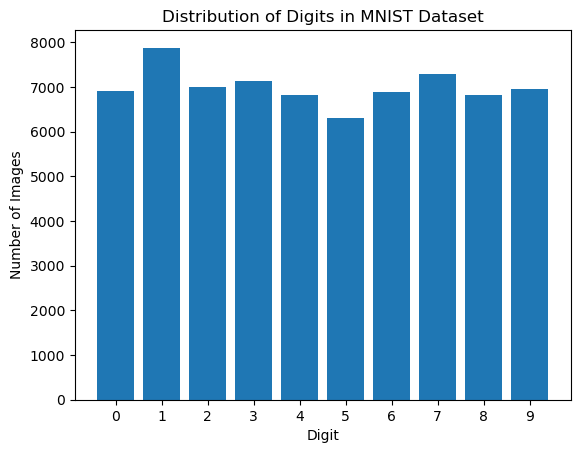

In [4]:
# Combine the training and test sets to create the entire dataset
x_mnist = np.concatenate((x_train_mnist, x_test_mnist), axis=0)
y_mnist = np.concatenate((y_train_mnist, y_test_mnist), axis=0)

# Count the occurrences of each digit in the entire dataset
digit_counts = np.bincount(y_mnist)

# Create a bar plot (histogram) to visualize the distribution
digits = np.arange(10)
plt.bar(digits, digit_counts, tick_label=digits)
plt.xlabel('Digit')
plt.ylabel('Number of Images')
plt.title('Distribution of Digits in MNIST Dataset')
plt.show()

In [5]:
# Convert labels to one-hot encoded format
num_classes = len(np.unique(y_train_mnist))
Y_train = to_categorical(y_train_mnist, num_classes)
Y_test = to_categorical(y_test_mnist, num_classes)

# Normalize pixel values to the range [0, 1]
X_train = x_train_mnist.astype('float32') / 255.0
X_test = x_test_mnist.astype('float32') / 255.0

In [6]:
# Print the shapes of the input and output data
print("Training data input shape: " , X_train.shape)
print("Training data output shape: " , Y_train.shape)
print("Test data input shape: " , X_test.shape)
print("Test data ouput shape: " , Y_test.shape)

Training data input shape:  (60000, 28, 28)
Training data output shape:  (60000, 10)
Test data input shape:  (10000, 28, 28)
Test data ouput shape:  (10000, 10)


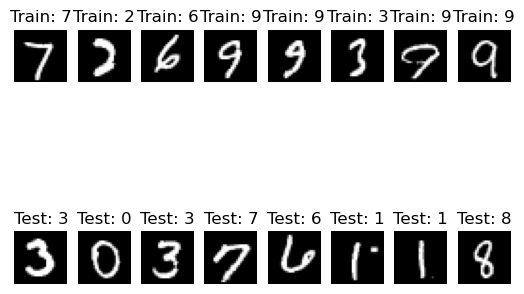

In [7]:
# Print a sample of the full dataset
num_samples = 8  # Number of samples to display
random_indices_train = np.random.choice(len(X_train), num_samples, replace=False)
random_indices_test = np.random.choice(len(X_test), num_samples, replace=False)
sample_images_train = X_train[random_indices_train]
sample_labels_train = Y_train[random_indices_train]
sample_images_test = X_test[random_indices_test]
sample_labels_test = Y_test[random_indices_test]

for i in range(num_samples):
    image_train = sample_images_train[i]
    label_train = np.argmax(sample_labels_train[i])
    image_test = sample_images_test[i]
    label_test = np.argmax(sample_labels_test[i])

    plt.subplot(2, num_samples, i+1)
    plt.imshow(image_train.squeeze(), cmap='gray')
    plt.title("Train: {}".format(label_train))
    plt.axis('off')
    
    plt.subplot(2, num_samples, num_samples+i+1)
    plt.imshow(image_test.squeeze(), cmap='gray')
    plt.title("Test: {}".format(label_test))
    plt.axis('off')

plt.show()

### CNN Baseline Experiment

In [8]:
# Training variables
BATCH_SIZE = 128
N_EPOCH = 40
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
LEARN_RATE = 0.001
OPTIM = Adam(learning_rate=LEARN_RATE)

print('Main variables initialised.')

Main variables initialised.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

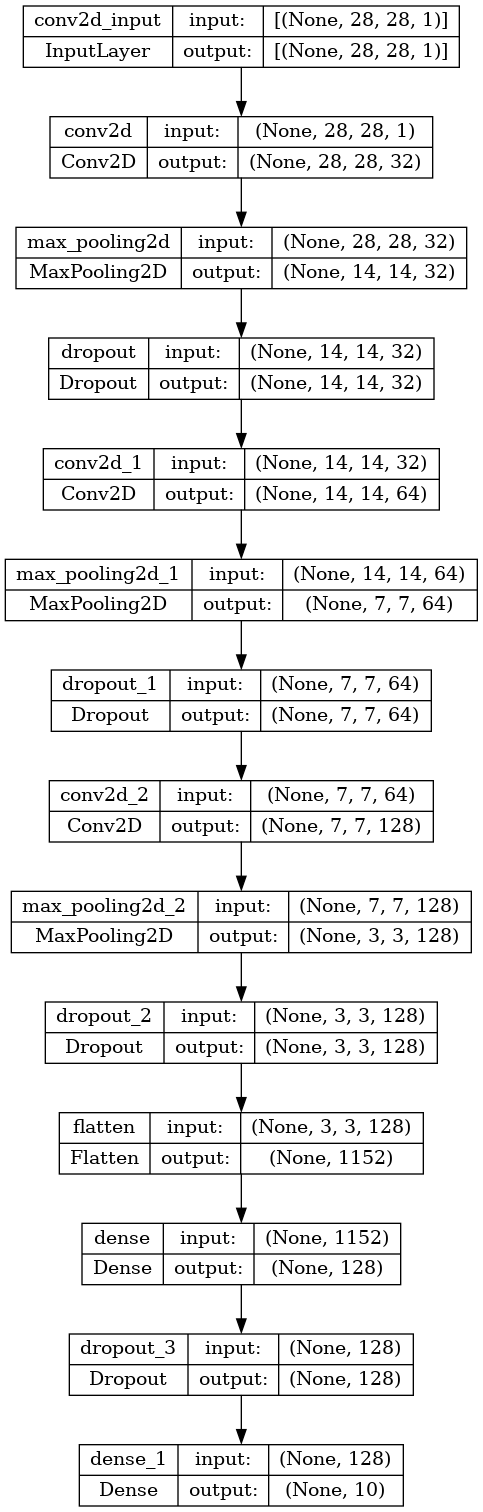

<Figure size 300x300 with 0 Axes>

In [9]:
# Network definition
model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

# Show the model summary
model.summary()

# Visualize the model architecture
plt.figure(figsize=(3, 3))
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

#### Training and Validation

In [10]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/40


2023-08-30 01:37:17.006756: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 7s 8ms/step - loss: 0.4745 - accuracy: 0.8455 - val_loss: 0.0802 - val_accuracy: 0.9758
Epoch 2/40
375/375 [==============================] - 3s 7ms/step - loss: 0.1359 - accuracy: 0.9608 - val_loss: 0.0517 - val_accuracy: 0.9840
Epoch 3/40
375/375 [==============================] - 3s 8ms/step - loss: 0.0946 - accuracy: 0.9726 - val_loss: 0.0450 - val_accuracy: 0.9866
Epoch 4/40
375/375 [==============================] - 3s 7ms/step - loss: 0.0813 - accuracy: 0.9761 - val_loss: 0.0412 - val_accuracy: 0.9872
Epoch 5/40
375/375 [==============================] - 3s 8ms/step - loss: 0.0668 - accuracy: 0.9795 - val_loss: 0.0331 - val_accuracy: 0.9907
Epoch 6/40
375/375 [==============================] - 3s 8ms/step - loss: 0.0621 - accuracy: 0.9817 - val_loss: 0.0315 - val_accuracy: 0.9909
Epoch 7/40
375/375 [==============================] - 3s 7ms/step - loss: 0.0556 - accuracy: 0.9838 - val_loss: 0.0337 - val_accuracy: 0.9898
Epoch 8/40
375/37

In [11]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0212 - accuracy: 0.9940
Test accuracy: 0.9940000176429749


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


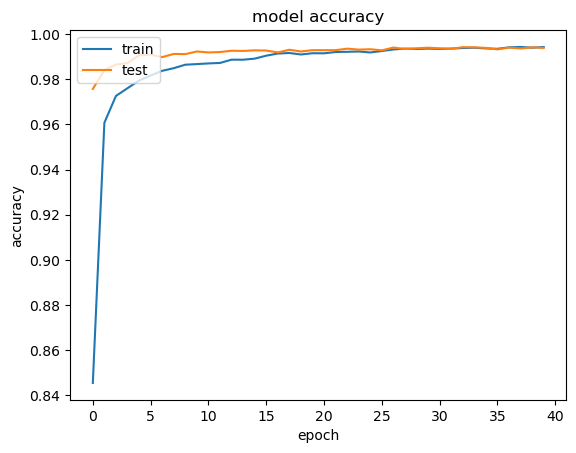

In [12]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

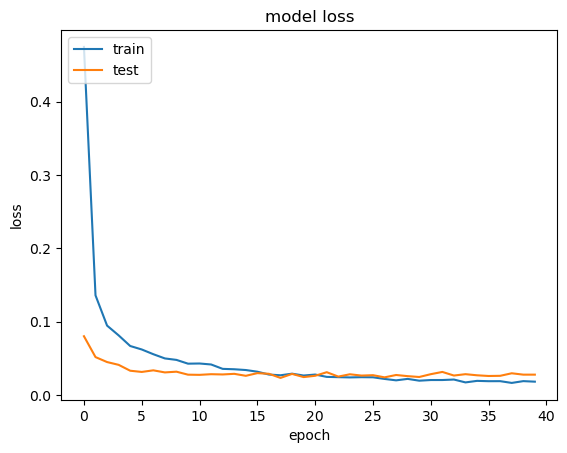

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Hyperparameter tuning

In [14]:
def create_cnn_model():
    
    # Network definition
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    return model

#### 1. Adam, 0.01

Main variables initialised.
Epoch 1/40
 15/375 [>.............................] - ETA: 2s - loss: 2.3547 - accuracy: 0.1224

2023-08-30 01:39:41.904685: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 0.5449 - accuracy: 0.8229 - val_loss: 0.0906 - val_accuracy: 0.9721
Epoch 2/40
375/375 [==============================] - 3s 7ms/step - loss: 0.2529 - accuracy: 0.9272 - val_loss: 0.0693 - val_accuracy: 0.9784
Epoch 3/40
375/375 [==============================] - 3s 7ms/step - loss: 0.2214 - accuracy: 0.9365 - val_loss: 0.0763 - val_accuracy: 0.9772
Epoch 4/40
375/375 [==============================] - 3s 8ms/step - loss: 0.2215 - accuracy: 0.9357 - val_loss: 0.0673 - val_accuracy: 0.9787
Epoch 5/40
375/375 [==============================] - 3s 7ms/step - loss: 0.2201 - accuracy: 0.9367 - val_loss: 0.0659 - val_accuracy: 0.9795
Epoch 6/40
375/375 [==============================] - 3s 7ms/step - loss: 0.2294 - accuracy: 0.9351 - val_loss: 0.0656 - val_accuracy: 0.9797
Epoch 7/40
375/375 [==============================] - 3s 7ms/step - loss: 0.2188 - accuracy: 0.9386 - val_loss: 0.0693 - val_accuracy: 0.9790
Epoch 8/40
375/37

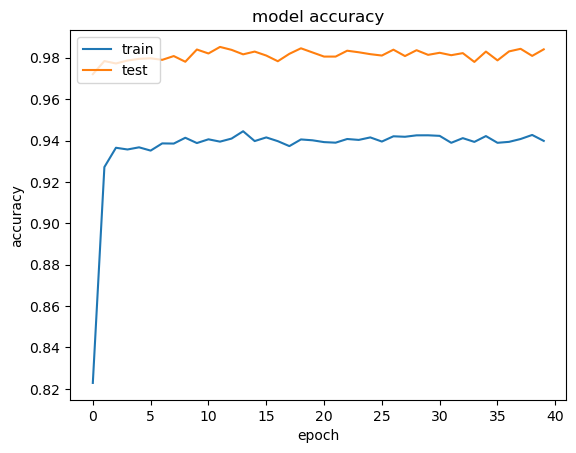

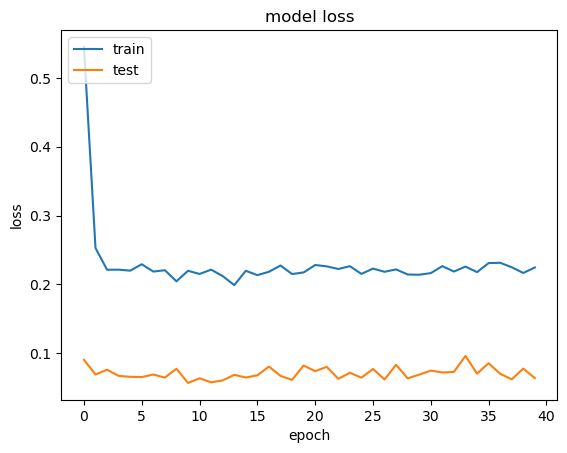

In [15]:
# Training variables
LEARN_RATE = 0.01
OPTIM = Adam(learning_rate=LEARN_RATE)

print('Main variables initialised.')

model1 = create_cnn_model()
model1.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history1 = model1.fit(X_train, Y_train, batch_size=128, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# Evaluate the model on the test set
test_loss1, test_acc1 = model1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc1)

# list all data in history
print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 2. Adam, 0.001

Main variables initialised.
Epoch 1/40
 15/375 [>.............................] - ETA: 2s - loss: 2.2381 - accuracy: 0.1797

2023-08-30 02:18:46.451657: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_13/dropout_52/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 0.4461 - accuracy: 0.8534 - val_loss: 0.0678 - val_accuracy: 0.9797
Epoch 2/40
375/375 [==============================] - 3s 7ms/step - loss: 0.1196 - accuracy: 0.9637 - val_loss: 0.0446 - val_accuracy: 0.9866
Epoch 3/40
375/375 [==============================] - 3s 7ms/step - loss: 0.0864 - accuracy: 0.9740 - val_loss: 0.0352 - val_accuracy: 0.9895
Epoch 4/40
375/375 [==============================] - 3s 8ms/step - loss: 0.0728 - accuracy: 0.9788 - val_loss: 0.0335 - val_accuracy: 0.9904
Epoch 5/40
375/375 [==============================] - 3s 7ms/step - loss: 0.0619 - accuracy: 0.9816 - val_loss: 0.0304 - val_accuracy: 0.9908
Epoch 6/40
375/375 [==============================] - 3s 7ms/step - loss: 0.0522 - accuracy: 0.9846 - val_loss: 0.0289 - val_accuracy: 0.9922
Epoch 7/40
375/375 [==============================] - 3s 7ms/step - loss: 0.0480 - accuracy: 0.9853 - val_loss: 0.0354 - val_accuracy: 0.9898
Epoch 8/40
375/37

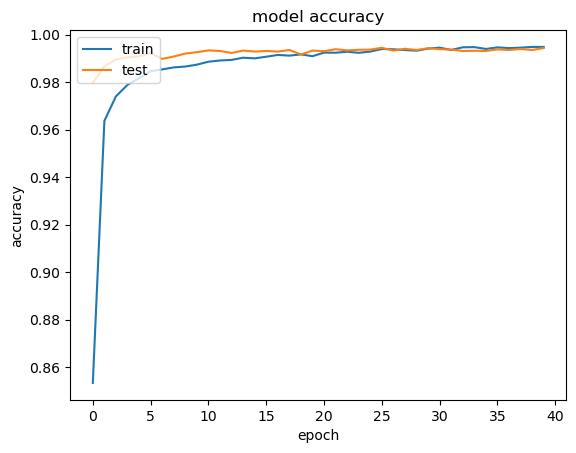

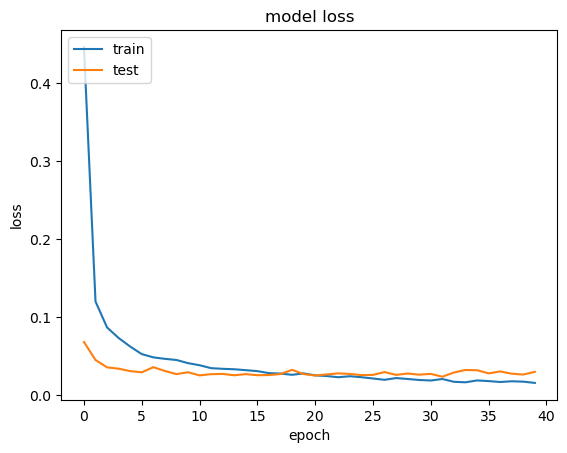

In [38]:
# Training variables
LEARN_RATE = 0.001
OPTIM = Adam(learning_rate=LEARN_RATE)

print('Main variables initialised.')

model2 = create_cnn_model()
model2.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history2 = model2.fit(X_train, Y_train, batch_size=128, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# Evaluate the model on the test set
test_loss2, test_acc2 = model2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc2)

# list all data in history
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 3. Adam, 0.0001

Main variables initialised.
Epoch 1/40
 15/375 [>.............................] - ETA: 2s - loss: 2.3039 - accuracy: 0.1063

2023-08-30 02:09:34.124529: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_12/dropout_48/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 8ms/step - loss: 1.3363 - accuracy: 0.5530 - val_loss: 0.3136 - val_accuracy: 0.9199
Epoch 2/40
375/375 [==============================] - 3s 7ms/step - loss: 0.4208 - accuracy: 0.8701 - val_loss: 0.1616 - val_accuracy: 0.9552
Epoch 3/40
375/375 [==============================] - 3s 7ms/step - loss: 0.2851 - accuracy: 0.9132 - val_loss: 0.1260 - val_accuracy: 0.9629
Epoch 4/40
375/375 [==============================] - 3s 7ms/step - loss: 0.2282 - accuracy: 0.9312 - val_loss: 0.1051 - val_accuracy: 0.9678
Epoch 5/40
375/375 [==============================] - 3s 7ms/step - loss: 0.1956 - accuracy: 0.9408 - val_loss: 0.0922 - val_accuracy: 0.9725
Epoch 6/40
375/375 [==============================] - 3s 7ms/step - loss: 0.1707 - accuracy: 0.9483 - val_loss: 0.0833 - val_accuracy: 0.9736
Epoch 7/40
375/375 [==============================] - 3s 7ms/step - loss: 0.1554 - accuracy: 0.9534 - val_loss: 0.0736 - val_accuracy: 0.9776
Epoch 8/40
375/37

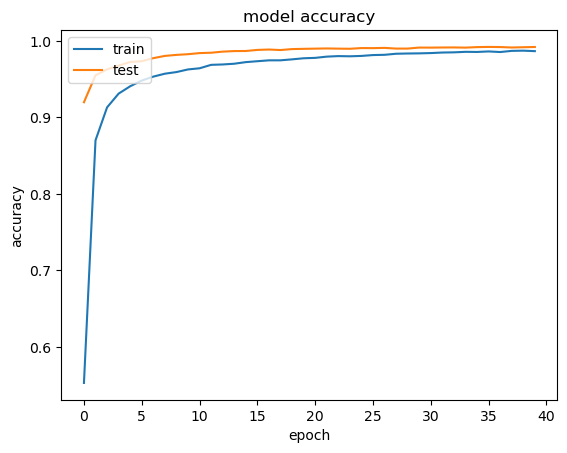

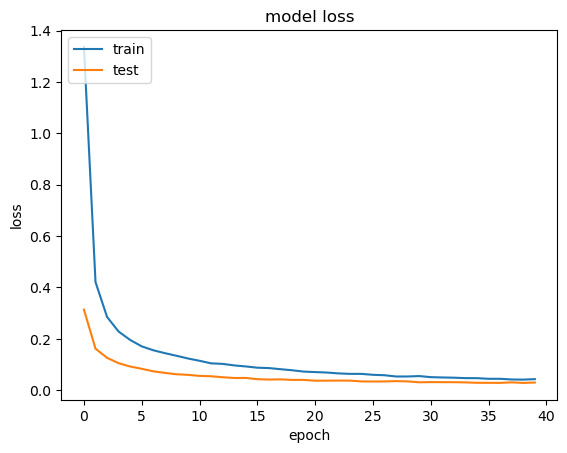

In [32]:
# Training variables
LEARN_RATE = 0.0001
OPTIM = Adam(learning_rate=LEARN_RATE)

print('Main variables initialised.')

model3 = create_cnn_model()
model3.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history3 = model3.fit(X_train, Y_train, batch_size=128, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# Evaluate the model on the test set
test_loss3, test_acc3 = model3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc3)

# list all data in history
print(history3.history.keys())
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 4. SGD, 0.01

Main variables initialised.
Epoch 1/40
 15/375 [>.............................] - ETA: 2s - loss: 2.3091 - accuracy: 0.1099

2023-08-30 01:48:58.746268: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_16/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 2.2444 - accuracy: 0.1981 - val_loss: 2.0293 - val_accuracy: 0.6121
Epoch 2/40
375/375 [==============================] - 3s 7ms/step - loss: 1.5195 - accuracy: 0.4912 - val_loss: 0.6536 - val_accuracy: 0.8571
Epoch 3/40
375/375 [==============================] - 3s 7ms/step - loss: 0.7982 - accuracy: 0.7349 - val_loss: 0.3286 - val_accuracy: 0.9233
Epoch 4/40
375/375 [==============================] - 3s 7ms/step - loss: 0.5448 - accuracy: 0.8248 - val_loss: 0.2258 - val_accuracy: 0.9424
Epoch 5/40
375/375 [==============================] - 3s 7ms/step - loss: 0.4301 - accuracy: 0.8670 - val_loss: 0.1808 - val_accuracy: 0.9495
Epoch 6/40
375/375 [==============================] - 3s 7ms/step - loss: 0.3688 - accuracy: 0.8865 - val_loss: 0.1604 - val_accuracy: 0.9543
Epoch 7/40
375/375 [==============================] - 3s 7ms/step - loss: 0.3263 - accuracy: 0.9002 - val_loss: 0.1377 - val_accuracy: 0.9594
Epoch 8/40
375/37

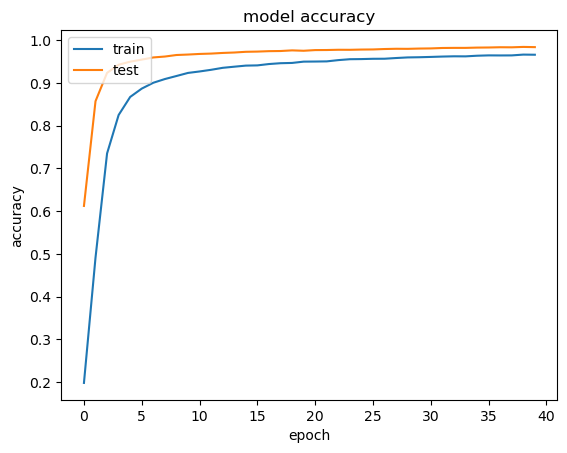

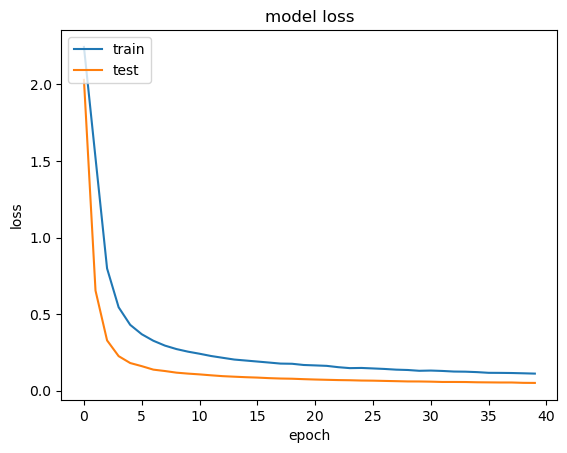

In [18]:
# Training variables
LEARN_RATE = 0.01
OPTIM = SGD(learning_rate=LEARN_RATE)

print('Main variables initialised.')

model4 = create_cnn_model()
model4.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history4 = model4.fit(X_train, Y_train, batch_size=128, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# Evaluate the model on the test set
test_loss4, test_acc4 = model4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc4)

# list all data in history
print(history4.history.keys())
# summarize history for accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 5. SGD, 0.001

Main variables initialised.
Epoch 1/40
 15/375 [>.............................] - ETA: 2s - loss: 2.3203 - accuracy: 0.0880

2023-08-30 01:51:23.877983: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_20/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 3s 8ms/step - loss: 2.3093 - accuracy: 0.1013 - val_loss: 2.2883 - val_accuracy: 0.1445
Epoch 2/40
375/375 [==============================] - 3s 7ms/step - loss: 2.2930 - accuracy: 0.1179 - val_loss: 2.2778 - val_accuracy: 0.3507
Epoch 3/40
375/375 [==============================] - 3s 7ms/step - loss: 2.2815 - accuracy: 0.1376 - val_loss: 2.2674 - val_accuracy: 0.4383
Epoch 4/40
375/375 [==============================] - 3s 7ms/step - loss: 2.2707 - accuracy: 0.1603 - val_loss: 2.2545 - val_accuracy: 0.4868
Epoch 5/40
375/375 [==============================] - 3s 7ms/step - loss: 2.2573 - accuracy: 0.1817 - val_loss: 2.2368 - val_accuracy: 0.5184
Epoch 6/40
375/375 [==============================] - 3s 8ms/step - loss: 2.2391 - accuracy: 0.2024 - val_loss: 2.2114 - val_accuracy: 0.5483
Epoch 7/40
375/375 [==============================] - 3s 7ms/step - loss: 2.2134 - accuracy: 0.2270 - val_loss: 2.1754 - val_accuracy: 0.5717
Epoch 8/40
375/37

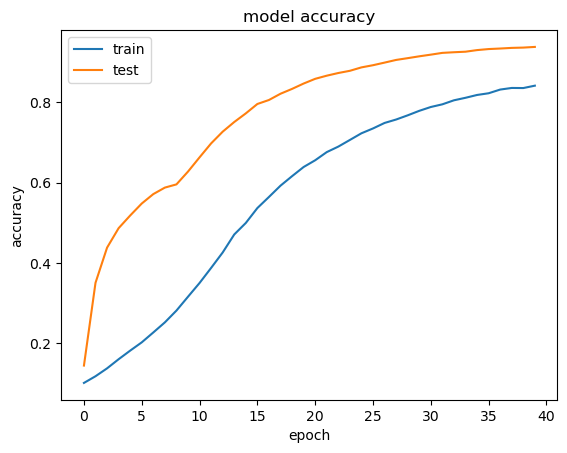

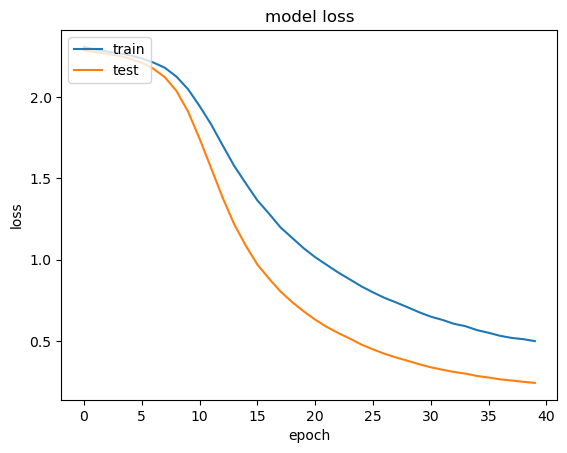

In [19]:
# Training variables
LEARN_RATE = 0.001
OPTIM = SGD(learning_rate=LEARN_RATE)

print('Main variables initialised.')

model5 = create_cnn_model()
model5.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history5 = model5.fit(X_train, Y_train, batch_size=128, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# Evaluate the model on the test set
test_loss5, test_acc5 = model5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc5)

# list all data in history
print(history5.history.keys())
# summarize history for accuracy
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 6. SGD, 0.0001

Main variables initialised.
Epoch 1/40
 14/375 [>.............................] - ETA: 2s - loss: 2.3127 - accuracy: 0.1094

2023-08-30 01:53:14.250347: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/dropout_24/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 2.3171 - accuracy: 0.1042 - val_loss: 2.3044 - val_accuracy: 0.1192
Epoch 2/40
375/375 [==============================] - 3s 7ms/step - loss: 2.3147 - accuracy: 0.1056 - val_loss: 2.3027 - val_accuracy: 0.1262
Epoch 3/40
375/375 [==============================] - 3s 7ms/step - loss: 2.3129 - accuracy: 0.1080 - val_loss: 2.3011 - val_accuracy: 0.1316
Epoch 4/40
375/375 [==============================] - 3s 7ms/step - loss: 2.3097 - accuracy: 0.1116 - val_loss: 2.2996 - val_accuracy: 0.1406
Epoch 5/40
375/375 [==============================] - 3s 7ms/step - loss: 2.3076 - accuracy: 0.1119 - val_loss: 2.2981 - val_accuracy: 0.1491
Epoch 6/40
375/375 [==============================] - 3s 7ms/step - loss: 2.3060 - accuracy: 0.1152 - val_loss: 2.2965 - val_accuracy: 0.1597
Epoch 7/40
375/375 [==============================] - 3s 7ms/step - loss: 2.3053 - accuracy: 0.1163 - val_loss: 2.2951 - val_accuracy: 0.1723
Epoch 8/40
375/37

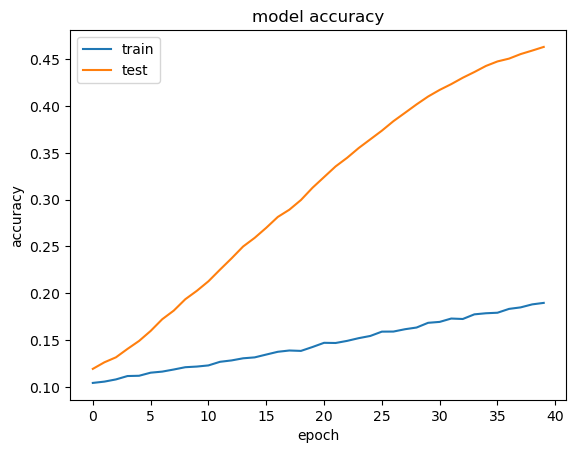

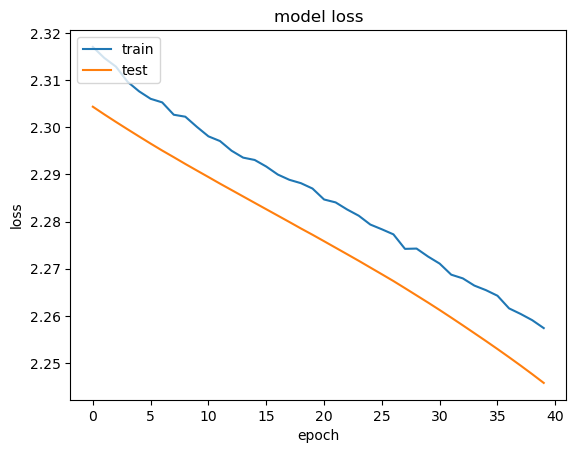

In [20]:
# Training variables
LEARN_RATE = 0.0001
OPTIM = SGD(learning_rate=LEARN_RATE)

print('Main variables initialised.')

model6 = create_cnn_model()
model6.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history6 = model6.fit(X_train, Y_train, batch_size=128, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# Evaluate the model on the test set
test_loss6, test_acc6 = model6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc6)

# list all data in history
print(history6.history.keys())
# summarize history for accuracy
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 7. RMSprop, 0.01

Main variables initialised.
Epoch 1/40
  7/375 [..............................] - ETA: 3s - loss: 5.4718 - accuracy: 0.1172  

2023-08-30 01:55:39.253884: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_28/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 8ms/step - loss: 0.6356 - accuracy: 0.8146 - val_loss: 0.0799 - val_accuracy: 0.9755
Epoch 2/40
375/375 [==============================] - 3s 7ms/step - loss: 0.2233 - accuracy: 0.9414 - val_loss: 0.0802 - val_accuracy: 0.9765
Epoch 3/40
375/375 [==============================] - 3s 7ms/step - loss: 0.2286 - accuracy: 0.9418 - val_loss: 0.0755 - val_accuracy: 0.9797
Epoch 4/40
375/375 [==============================] - 3s 7ms/step - loss: 0.2414 - accuracy: 0.9425 - val_loss: 0.0931 - val_accuracy: 0.9743
Epoch 5/40
375/375 [==============================] - 3s 8ms/step - loss: 0.2610 - accuracy: 0.9391 - val_loss: 0.1016 - val_accuracy: 0.9700
Epoch 6/40
375/375 [==============================] - 3s 8ms/step - loss: 0.2838 - accuracy: 0.9345 - val_loss: 0.0770 - val_accuracy: 0.9821
Epoch 7/40
375/375 [==============================] - 3s 7ms/step - loss: 0.2938 - accuracy: 0.9307 - val_loss: 0.1231 - val_accuracy: 0.9742
Epoch 8/40
375/37

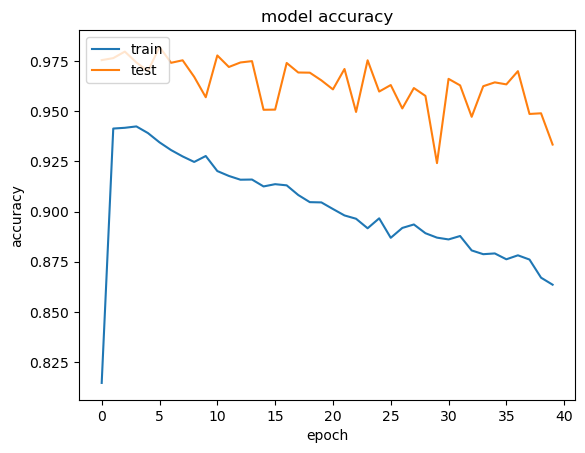

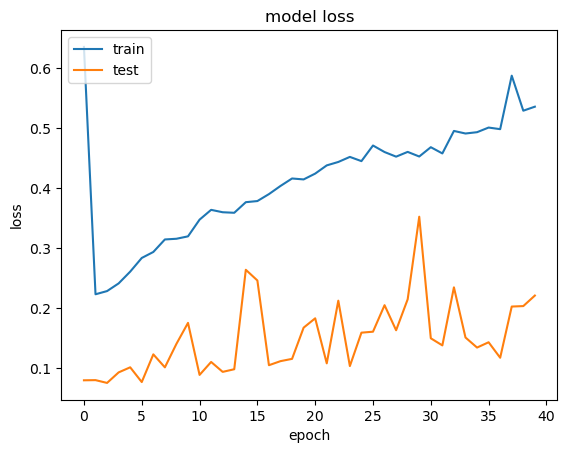

In [21]:
# Training variables
LEARN_RATE = 0.01
OPTIM = RMSprop(learning_rate=LEARN_RATE)

print('Main variables initialised.')

model7 = create_cnn_model()
model7.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history7 = model7.fit(X_train, Y_train, batch_size=128, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# Evaluate the model on the test set
test_loss7, test_acc7 = model7.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc7)

# list all data in history
print(history7.history.keys())
# summarize history for accuracy
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 8. RMSprop, 0.001

Main variables initialised.
Epoch 1/40
 13/375 [>.............................] - ETA: 3s - loss: 2.1164 - accuracy: 0.2404

2023-08-30 01:57:34.110462: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_8/dropout_32/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 8ms/step - loss: 0.4074 - accuracy: 0.8673 - val_loss: 0.0720 - val_accuracy: 0.9776
Epoch 2/40
375/375 [==============================] - 3s 7ms/step - loss: 0.1209 - accuracy: 0.9645 - val_loss: 0.0522 - val_accuracy: 0.9846
Epoch 3/40
375/375 [==============================] - 3s 7ms/step - loss: 0.0869 - accuracy: 0.9738 - val_loss: 0.0382 - val_accuracy: 0.9881
Epoch 4/40
375/375 [==============================] - 3s 7ms/step - loss: 0.0688 - accuracy: 0.9792 - val_loss: 0.0438 - val_accuracy: 0.9855
Epoch 5/40
375/375 [==============================] - 3s 7ms/step - loss: 0.0617 - accuracy: 0.9815 - val_loss: 0.0304 - val_accuracy: 0.9908
Epoch 6/40
375/375 [==============================] - 3s 7ms/step - loss: 0.0532 - accuracy: 0.9845 - val_loss: 0.0355 - val_accuracy: 0.9905
Epoch 7/40
375/375 [==============================] - 3s 7ms/step - loss: 0.0502 - accuracy: 0.9847 - val_loss: 0.0269 - val_accuracy: 0.9921
Epoch 8/40
375/37

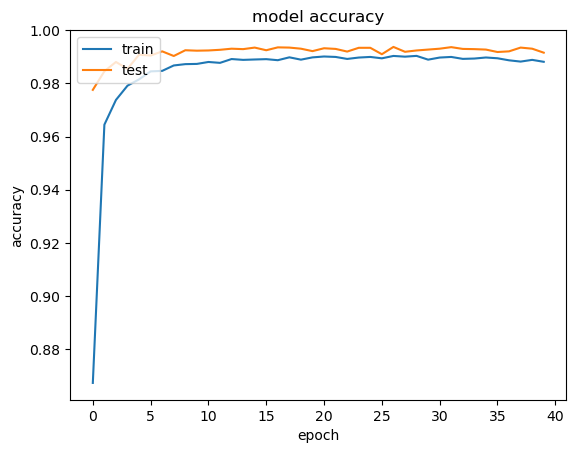

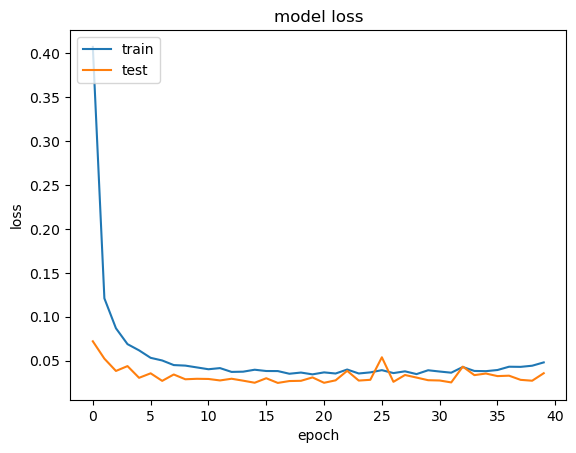

In [22]:
# Training variables
LEARN_RATE = 0.001
OPTIM = RMSprop(learning_rate=LEARN_RATE)

print('Main variables initialised.')

model8 = create_cnn_model()
model8.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history8 = model8.fit(X_train, Y_train, batch_size=128, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# Evaluate the model on the test set
test_loss8, test_acc8 = model8.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc8)

# list all data in history
print(history8.history.keys())
# summarize history for accuracy
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 9. RMSprop, 0.0001

Main variables initialised.
Epoch 1/40
 13/375 [>.............................] - ETA: 3s - loss: 2.3024 - accuracy: 0.1022

2023-08-30 01:59:58.962668: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_9/dropout_36/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 8ms/step - loss: 1.5535 - accuracy: 0.4784 - val_loss: 0.5422 - val_accuracy: 0.8773
Epoch 2/40
375/375 [==============================] - 3s 7ms/step - loss: 0.6056 - accuracy: 0.8053 - val_loss: 0.2159 - val_accuracy: 0.9399
Epoch 3/40
375/375 [==============================] - 3s 9ms/step - loss: 0.3625 - accuracy: 0.8883 - val_loss: 0.1482 - val_accuracy: 0.9572
Epoch 4/40
375/375 [==============================] - 3s 7ms/step - loss: 0.2741 - accuracy: 0.9154 - val_loss: 0.1161 - val_accuracy: 0.9661
Epoch 5/40
375/375 [==============================] - 3s 7ms/step - loss: 0.2233 - accuracy: 0.9320 - val_loss: 0.0969 - val_accuracy: 0.9714
Epoch 6/40
375/375 [==============================] - 3s 7ms/step - loss: 0.1919 - accuracy: 0.9418 - val_loss: 0.0863 - val_accuracy: 0.9743
Epoch 7/40
375/375 [==============================] - 3s 7ms/step - loss: 0.1723 - accuracy: 0.9474 - val_loss: 0.0775 - val_accuracy: 0.9758
Epoch 8/40
375/37

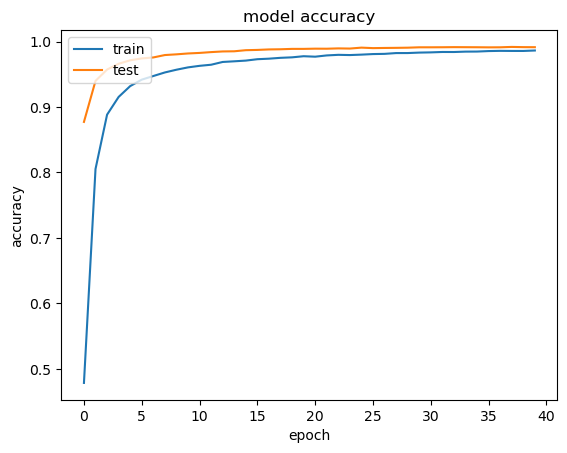

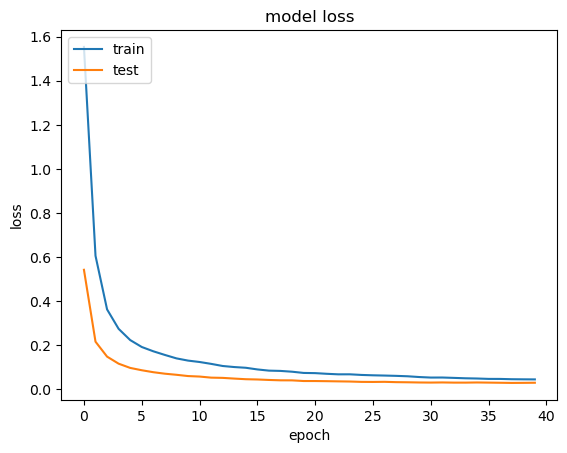

In [23]:
# Training variables
LEARN_RATE = 0.0001
OPTIM = RMSprop(learning_rate=LEARN_RATE)

print('Main variables initialised.')

model9 = create_cnn_model()
model9.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history9 = model9.fit(X_train, Y_train, batch_size=128, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# Evaluate the model on the test set
test_loss9, test_acc9 = model9.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc9)

# list all data in history
print(history9.history.keys())
# summarize history for accuracy
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Predictions of top 3

In [39]:
# Function to make predictions on a single sample image
def predict_single_image(model, sample_image):
    sample_image = np.array(sample_image).reshape(1, 28, 28, 1).astype('float32') / 255.0
    prediction = model.predict(sample_image)[0]
    predicted_label = np.argmax(prediction)
    confidence_percentage = np.max(prediction) * 100
    return predicted_label, confidence_percentage

1/1 [==============================] - 0s 35ms/step


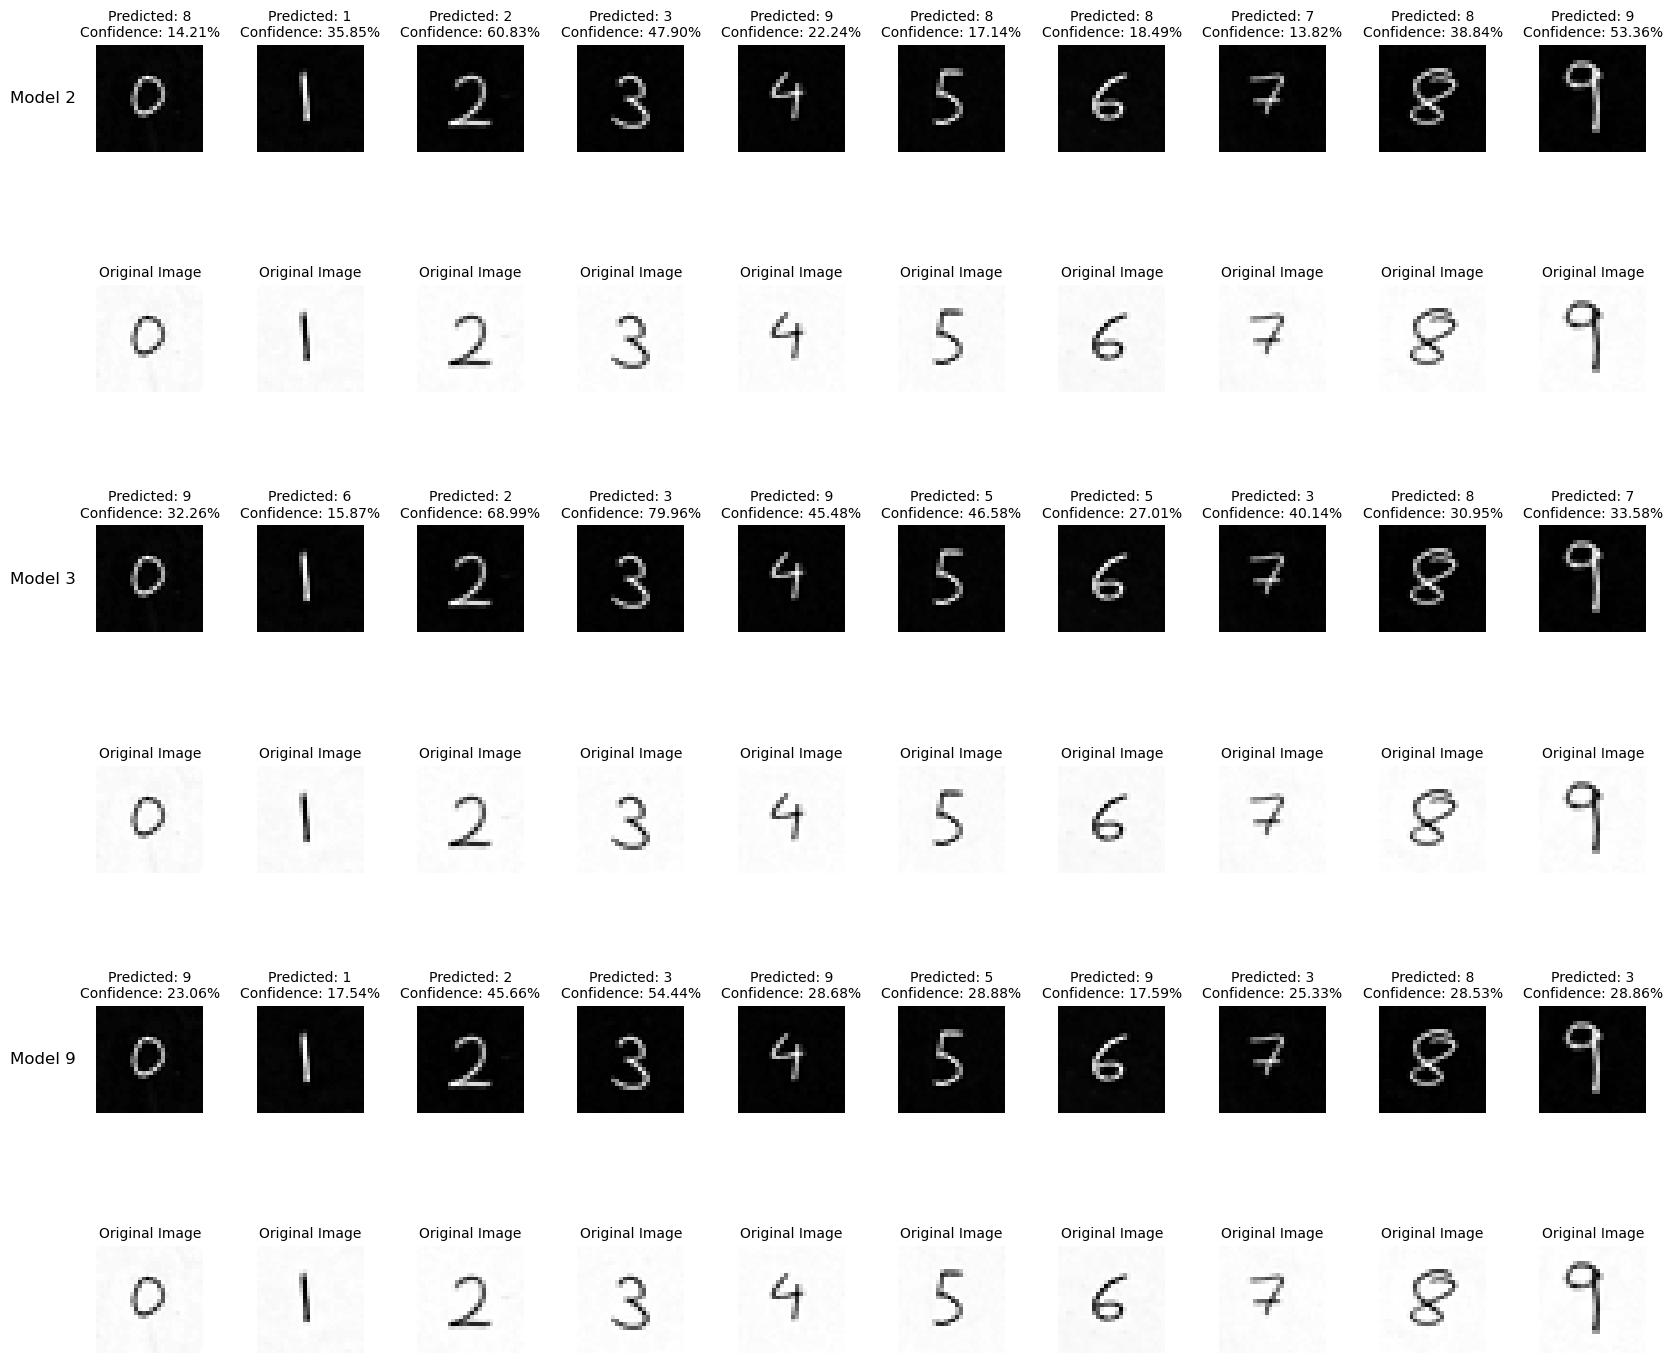

In [40]:
# Sample images for prediction
sample_image_paths = [
    "/kaggle/input/single-digits/0.png",
    "/kaggle/input/single-digits/1.png",
    "/kaggle/input/single-digits/2.png",
    "/kaggle/input/single-digits/3.png",
    "/kaggle/input/single-digits/4.png",
    "/kaggle/input/single-digits/5.png",
    "/kaggle/input/single-digits/6.png",
    "/kaggle/input/single-digits/7.png",
    "/kaggle/input/single-digits/8.png",
    "/kaggle/input/single-digits/9.png",
]

# List of models
models_list = [model2, model3, model9] 

# Set the common figure size for all images and number of columns for the subplot
num_images = len(sample_image_paths)
num_models = len(models_list)
fig, axs = plt.subplots(num_models * 2, num_images, figsize=(num_images * 2, num_models * 6))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.3)

# Model names corresponding to the models in models_list
model_names = ["Model 2", "Model 3", "Model 9"]

for j, model in enumerate(models_list):
    # Call the function to display each image with its prediction
    for i, image_path in enumerate(sample_image_paths):
        # Load and preprocess the image
        sample_image = Image.open(image_path).convert("L")  # Convert to grayscale
        sample_image = sample_image.resize((28, 28))  # Resize to MNIST image size 

        # Convert to black background with white digit
        sample_image_array = 255 - np.array(sample_image)

        # Make predictions on the enhanced image
        predicted_label, confidence_percentage = predict_single_image(model, sample_image_array)  # You need to define this function

        
        # Display the enhanced image with black background and clearer white digit
        axs[j * 2, i].imshow(sample_image_array, cmap='gray')
        axs[j * 2, i].set_title(f"Predicted: {predicted_label}\nConfidence: {confidence_percentage:.2f}%", fontsize=10)
        axs[j * 2, i].axis('off')
        
        # Display the original image below the enhanced image
        axs[j * 2 + 1, i].imshow(sample_image, cmap='gray')
        axs[j * 2 + 1, i].set_title("Original Image", fontsize=10)
        axs[j * 2 + 1, i].axis('off')
        
    # Adding correct model name as a title to the left of the rows
    axs[j * 2, 0].annotate(model_names[j], xy=(-0.5, 0.5), xycoords='axes fraction', va='center', ha='center', fontsize=12)

# Rotate x-axis tick labels to accommodate longer text
for ax in axs.flat:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.show()

#### Prediction of top 3 with enhancement

In [41]:
# Function to make predictions on a single sample image
def predict_single_image(model, sample_image):
    sample_image = np.array(sample_image).reshape(1, 28, 28, 1).astype('float32') / 255.0
    prediction = model.predict(sample_image)[0]
    predicted_label = np.argmax(prediction)
    confidence_percentage = np.max(prediction) * 100
    return predicted_label, confidence_percentage

# Function to enhance the image (increase contrast and brightness)
def enhance_image(sample_image_array):
    enhancer = ImageEnhance.Contrast(Image.fromarray(sample_image_array))
    enhanced_image_array = np.array(enhancer.enhance(2.0))  # Increase contrast 
    return enhanced_image_array

1/1 [==============================] - 0s 22ms/step


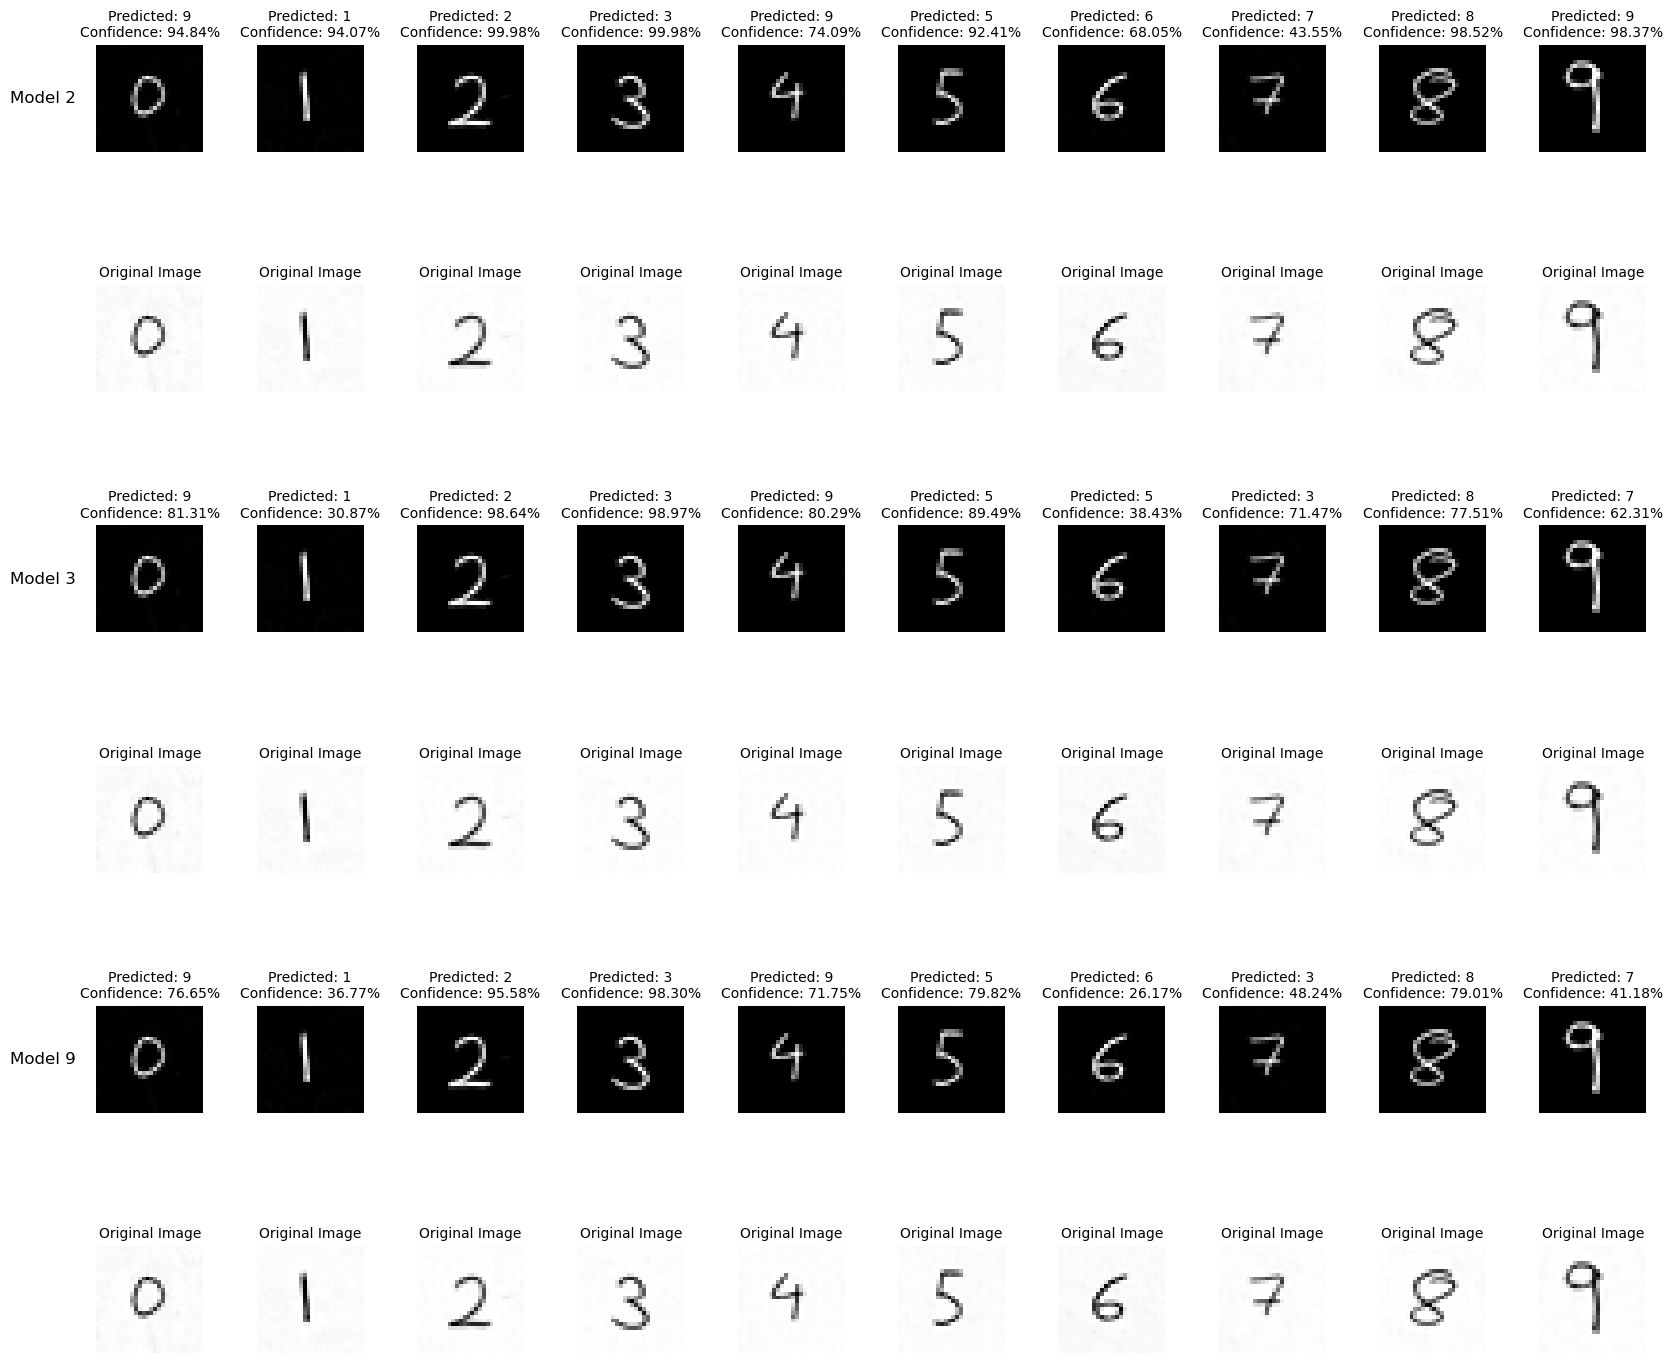

In [42]:
# Sample images for prediction
sample_image_paths = [
    "/kaggle/input/single-digits/0.png",
    "/kaggle/input/single-digits/1.png",
    "/kaggle/input/single-digits/2.png",
    "/kaggle/input/single-digits/3.png",
    "/kaggle/input/single-digits/4.png",
    "/kaggle/input/single-digits/5.png",
    "/kaggle/input/single-digits/6.png",
    "/kaggle/input/single-digits/7.png",
    "/kaggle/input/single-digits/8.png",
    "/kaggle/input/single-digits/9.png",
]

# List of models
models_list = [model2, model3, model9] 

# Set the common figure size for all images and number of columns for the subplot
num_images = len(sample_image_paths)
num_models = len(models_list)
fig, axs = plt.subplots(num_models * 2, num_images, figsize=(num_images * 2, num_models * 6))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.3)

# Model names corresponding to the models in models_list
model_names = ["Model 2", "Model 3", "Model 9"]

for j, model in enumerate(models_list):
    for i, image_path in enumerate(sample_image_paths):
        sample_image = Image.open(image_path).convert("L")
        sample_image = sample_image.resize((28, 28))
        sample_image_array = 255 - np.array(sample_image)
        enhanced_image_array = enhance_image(sample_image_array)
        
        predicted_label, confidence_percentage = predict_single_image(model, enhanced_image_array)

        axs[j * 2, i].imshow(enhanced_image_array, cmap='gray')
        axs[j * 2, i].set_title(f"Predicted: {predicted_label}\nConfidence: {confidence_percentage:.2f}%", fontsize=10)
        axs[j * 2, i].axis('off')

        axs[j * 2 + 1, i].imshow(sample_image, cmap='gray')
        axs[j * 2 + 1, i].set_title("Original Image", fontsize=10)
        axs[j * 2 + 1, i].axis('off')

    # Adding correct model name as a title to the left of the rows
    axs[j * 2, 0].annotate(model_names[j], xy=(-0.5, 0.5), xycoords='axes fraction', va='center', ha='center', fontsize=12)

# Rotate x-axis tick labels to accommodate longer text
for ax in axs.flat:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.show()

In [43]:
model2.save('my_best_model.h5')

### Predictions of top model on MNIST

1/1 [==============================] - 0s 84ms/step


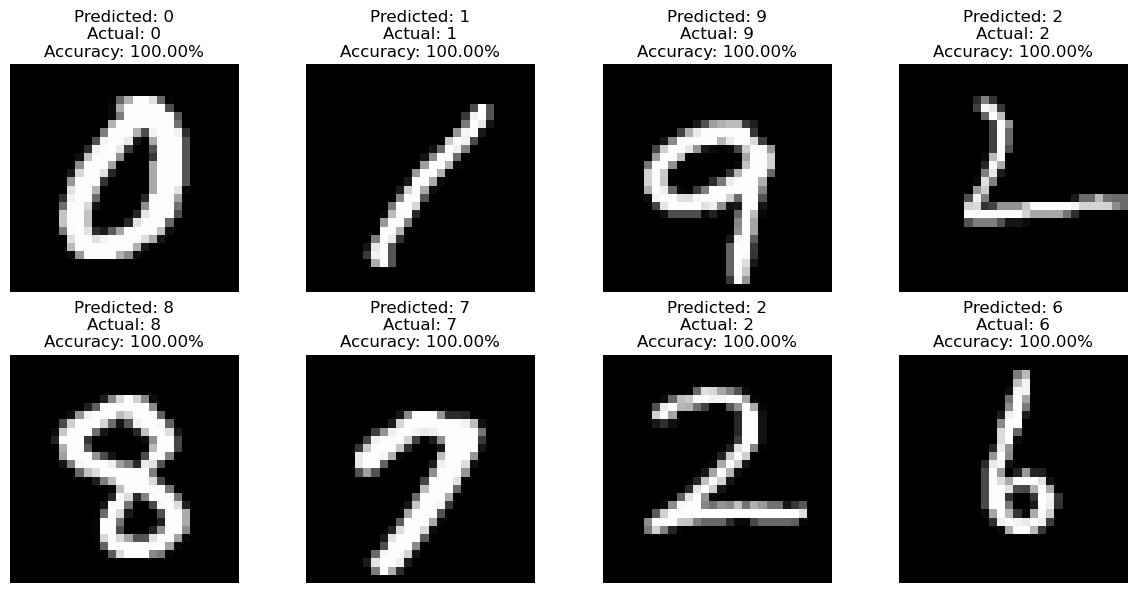

In [44]:
# Rest of your code
num_samples = 8
random_indices_test = np.random.choice(len(X_test), num_samples, replace=False)
sample_images = X_test[random_indices_test]
sample_labels = Y_test[random_indices_test]

# Reshape sample_images to match the expected input shape
sample_images_reshaped = sample_images.reshape(num_samples, 28, 28, 1)

# Predict labels for sample images
predictions = model2.predict(sample_images_reshaped)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to actual labels
actual_labels = np.argmax(sample_labels, axis=1)

# Define label names
label_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Calculate accuracy for each image
accuracies = np.equal(predicted_labels, actual_labels)
accuracy_percentage = np.mean(accuracies) * 100

# Display sample images with predicted and actual labels and accuracies
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()

for i in range(num_samples):
    axes[i].imshow(sample_images[i].squeeze(), cmap='gray')
    axes[i].set_title(f'Predicted: {label_names[predicted_labels[i]]}\nActual: {label_names[actual_labels[i]]}\nAccuracy: {accuracy_percentage:.2f}%')
    axes[i].axis('off')

plt.tight_layout()
plt.show()